<a href="https://colab.research.google.com/github/whitehatjr1001/Brain-Tumor/blob/main/brain_tumour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from PIL import Image

from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import normalize, to_categorical

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras import layers, Sequential
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.environ['KAGGLE_CONFIG_DIR']="/content/drive/MyDrive/Kaggle"

In [5]:
!kaggle datasets download -d ahmedhamada0/brain-tumor-detection

 94% 79.0M/84.0M [00:00<00:00, 116MB/s] 
100% 84.0M/84.0M [00:00<00:00, 109MB/s]


In [7]:
!unzip brain-tumor-detection.zip

Archive:  brain-tumor-detection.zip
  inflating: Br35H-Mask-RCNN/TEST/annotations_test.json  
  inflating: Br35H-Mask-RCNN/TEST/y701.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y702.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y703.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y704.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y705.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y706.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y707.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y708.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y709.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y710.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y711.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y712.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y713.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y714.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y715.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y716.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y717.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y718.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y719.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y720.jpg  
  infl

In [8]:
os.mkdir('Brain-tumor-')

In [10]:
image_directory='/content/Brain-tumor-/'
no_tumor_images=os.listdir(image_directory+ 'no/')
yes_tumor_images=os.listdir(image_directory+ 'yes/')

print('No Tumor: ', len(no_tumor_images))
print('Tumor: ',len(yes_tumor_images))

No Tumor:  1500
Tumor:  1500


In [ ]:
dataset=[]
label=[]

INPUT_SIZE=64

In [ ]:
for i , image_name in enumerate(no_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'no/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [ ]:
for i , image_name in enumerate(yes_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'yes/'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [ ]:
dataset=np.array(dataset)
label=np.array(label)

print('Dataset: ',len(dataset))
print('Label: ',len(label))

Dataset:  3000
Label:  3000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=2023)

In [ ]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.5),
])

resize_and_rescale =tf.keras.Sequential([
  layers.Resizing(180, 180),
  layers.Rescaling(1./255)
])

In [ ]:
def cnn_model():
    cnn_sequential=Sequential([
        data_augmentation,
        layers.Input(shape=(64,64,3), name='input_image'),

        layers.Conv2D(32, kernel_size=3, activation='relu',kernel_initializer='he_uniform'),
         layers.Conv2D(32, kernel_size=3, activation='relu',kernel_initializer='he_uniform'),
        layers.MaxPool2D(pool_size=2),

        layers.Conv2D(64, kernel_size=3, activation='relu',kernel_initializer='he_uniform'),
        layers.MaxPool2D(pool_size=2),

        layers.Conv2D(64, kernel_size=3, activation='relu',kernel_initializer='he_uniform'),
        layers.MaxPool2D(pool_size=2),

        layers.Conv2D(128, kernel_size=3, activation='relu',kernel_initializer='he_uniform'),
        layers.MaxPool2D(pool_size=2),

        layers.Flatten(),
        layers.Dense(64,activation='relu'),

        layers.Dropout(0.5),
        layers.Dense(1,activation='sigmoid')

    ], name='cnn_sequential_model')

    return cnn_sequential

In [ ]:
model = cnn_model()

In [ ]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True)



In [ ]:
# compile the model
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train,
batch_size=32,
verbose=1, epochs=30,
validation_data=(X_test, y_test),
shuffle=False)

Epoch 1/30
75/75 [==============================] - 23s 276ms/step - loss: 0.6278 - accuracy: 0.6400 - val_loss: 0.6381 - val_accuracy: 0.7233
Epoch 2/30
75/75 [==============================] - 20s 264ms/step - loss: 0.5392 - accuracy: 0.7471 - val_loss: 0.4876 - val_accuracy: 0.7883
Epoch 3/30
75/75 [==============================] - 20s 267ms/step - loss: 0.5006 - accuracy: 0.7788 - val_loss: 0.4938 - val_accuracy: 0.7767
Epoch 4/30
75/75 [==============================] - 20s 267ms/step - loss: 0.4712 - accuracy: 0.8029 - val_loss: 0.4748 - val_accuracy: 0.7750
Epoch 5/30
75/75 [==============================] - 19s 260ms/step - loss: 0.4387 - accuracy: 0.8133 - val_loss: 0.4126 - val_accuracy: 0.8267
Epoch 6/30
75/75 [==============================] - 20s 263ms/step - loss: 0.4212 - accuracy: 0.8167 - val_loss: 0.4520 - val_accuracy: 0.7950
Epoch 7/30
75/75 [==============================] - 19s 259ms/step - loss: 0.4001 - accuracy: 0.8246 - val_loss: 0.4952 - val_accuracy: 0.7867

## Save the Model

In [ ]:
model.save('BrainTumorDetection.h5')

In [ ]:
model = load_model('/kaggle/working/BrainTumorDetection.h5')

In [ ]:
def make_prediction(img):

    input_img = np.expand_dims(img, axis=0)

    res = (model.predict(input_img) > 0.5).astype("int32")
    return res

In [ ]:
def show_result(img):
    img_path = f"{image_directory}pred/{img}"
    image = cv2.imread(img_path)

    img = Image.fromarray(image)

    img = img.resize((64,64))

    img = np.array(img)

    plt.imshow(img)
    plt.show()

    pred = make_prediction(img)
    if pred:
        print("Tumor Detected")
    else:
        print("No Tumor")

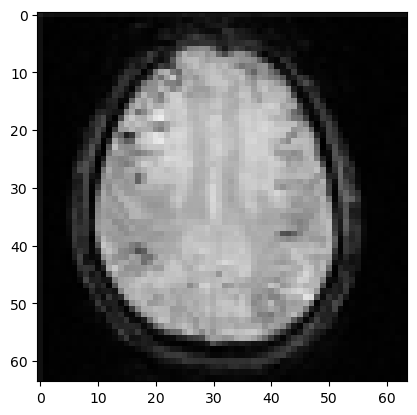

1/1 [==============================] - 0s 26ms/step
No Tumor


In [ ]:
show_result('pred20.jpg')